In [1]:
import csv
import anndata as ad
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adata=ad.read_h5ad("./results_preneopl_acinar_harm_paga_pseudotime.h5ad")

In [3]:
gene_expression_matrix = adata.X 
dpt_pseudotime_values = adata.obs['dpt_pseudotime']

genes_to_correlate = range(gene_expression_matrix.shape[1])


if isinstance(genes_to_correlate, list):
    selected_gene_expression_matrix = adata[:, genes_to_correlate].X
else:
    selected_gene_expression_matrix = gene_expression_matrix 

selected_gene_expression_matrix_dense = selected_gene_expression_matrix.toarray()

correlations = []
gene_names = adata.var_names 

for i in range(selected_gene_expression_matrix_dense.shape[1]):
    gene_expression = selected_gene_expression_matrix_dense[:, i]
    corr, _ = pearsonr(gene_expression, dpt_pseudotime_values)
    correlations.append((gene_names[i], corr))

correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

csv_filename = "gene_correlations_with_dpt_pseudotime.csv"

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Gene', 'Correlation'])

    for gene, corr in correlations_sorted:
        writer.writerow([gene, corr])

C:\Users\thmet\miniconda3\envs\thomas\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [4]:
file = "./gene_correlations_with_dpt_pseudotime.csv"
df = pd.read_csv(file, sep = ";")
df=df.head(100)
df = df.sort_values(by="Correlation")

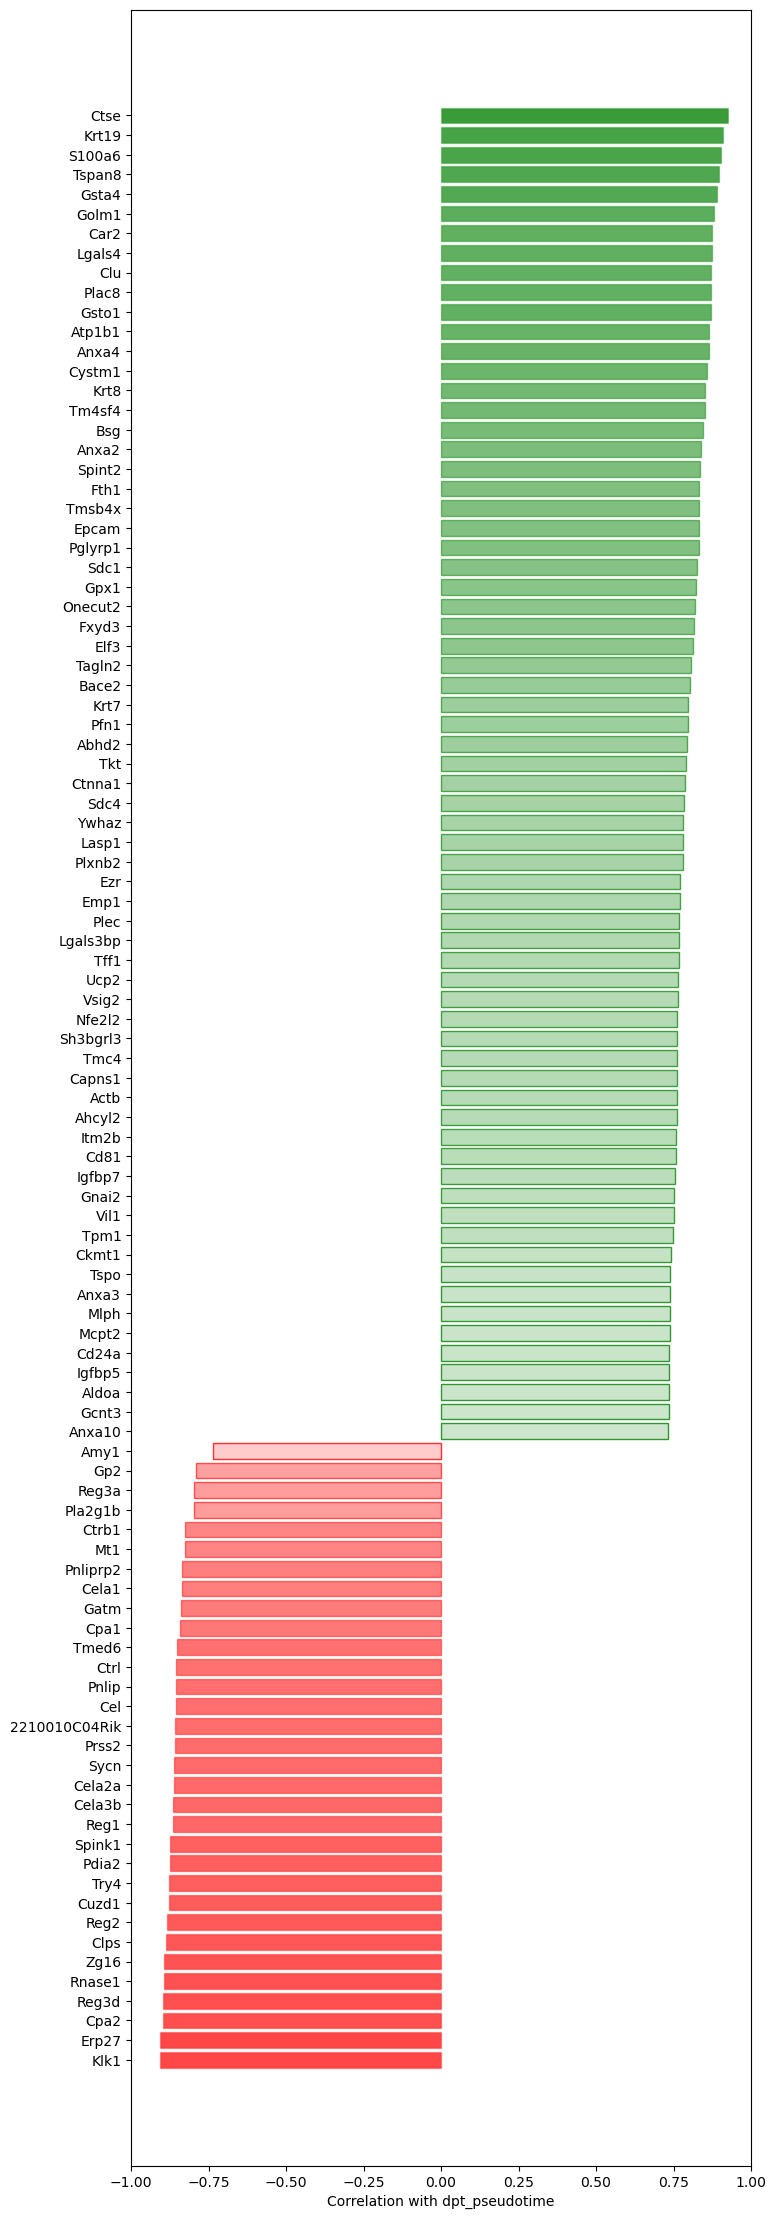

In [5]:
fig, ax = plt.subplots(figsize=(8,28))

facecolors = ['green' if y > 0 else 'red' for y in df["Correlation"]]
edgecolors = facecolors

abs_y = [abs(y) for y in df["Correlation"]]
face_alphas = [1 - (1-n)*3 for n in abs_y]
edge_alphas = [1 - alpha for alpha in face_alphas]

colors_with_alphas = list(zip(facecolors, face_alphas))
edgecolors_with_alphas = list(zip(edgecolors, edge_alphas))

ax.barh(df["Gene"], df["Correlation"], color=colors_with_alphas, edgecolor=edgecolors_with_alphas)
ax.set_xlabel("Correlation with dpt_pseudotime")
ax.set_xlim([-1, 1])

plt.savefig("./barh_correlation_pseudotime.pdf")
plt.savefig("./barh_correlation_pseudotime.tiff")